### Importing Libraries

### installing pandasql -> which help us in writing queries with SQL

In [4]:
pip install -U pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26817 sha256=b62c1c9cbc19534b5c076e794267cf9fe4013eaf488575e70d1072ad2deaef9b
  Stored in directory: /Users/ashishgohil/Library/Caches/pip/wheels/ed/8f/46/a383923333728744f01ba24adbd8e364f2cb9470a8b8e5b9ff
Successfully built pandasql
Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

### Importing Data

In [24]:
vgs = pd.read_csv('../project6/vgsales.csv')
vgs.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### As shown below the sales data comparing which platform has sold how many consoles in North America and in Global.

### We can assume by looking below that PS3 has the lowest amount of sales in NA & Global, where XBox 360 is highest grossing console among all 4 with leading in both NA & Global.

In [32]:
xbox='''
        select Platform, SUM(NA_Sales) as "Total NA_Sales", SUM(Global_Sales) as "Total Global_Sales" 
        from vgs
        where Platform ="X360"
        '''
ps4='''
        select Platform, SUM(NA_Sales) as "Total NA_Sales", SUM(Global_Sales) as "Total Global_Sales" 
        from vgs
        where Platform ="PS4"
        '''
wii='''
        select Platform, SUM(NA_Sales) as "Total NA_Sales", SUM(Global_Sales) as "Total Global_Sales" 
        from vgs
        where Platform ="Wii"
        '''
psp='''
        select Platform, SUM(NA_Sales) as "Total NA_Sales", SUM(Global_Sales) as "Total Global_Sales" 
        from vgs
        where Platform ="PSP"
        '''

print(sqldf(xbox,locals()))
print(sqldf(ps4,locals()))
print(sqldf(wii,locals()))
print(sqldf(psp,locals()))

  Platform  Total NA_Sales  Total Global_Sales
0     X360          601.05              979.96
  Platform  Total NA_Sales  Total Global_Sales
0      PS4            96.8               278.1
  Platform  Total NA_Sales  Total Global_Sales
0      Wii          507.71              926.71
  Platform  Total NA_Sales  Total Global_Sales
0      PSP          108.99              296.28


### Top 10 selling titles 

In [33]:
top10 = ''' 
select Name, Platform, NA_Sales, Global_Sales
from vgs
order by Global_Sales DESC
limit 10
'''

print(sqldf(top10, globals()))

                        Name Platform  NA_Sales  Global_Sales
0                 Wii Sports      Wii     41.49         82.74
1          Super Mario Bros.      NES     29.08         40.24
2             Mario Kart Wii      Wii     15.85         35.82
3          Wii Sports Resort      Wii     15.75         33.00
4   Pokemon Red/Pokemon Blue       GB     11.27         31.37
5                     Tetris       GB     23.20         30.26
6      New Super Mario Bros.       DS     11.38         30.01
7                   Wii Play      Wii     14.03         29.02
8  New Super Mario Bros. Wii      Wii     14.59         28.62
9                  Duck Hunt      NES     26.93         28.31


### SQL queries into dataframes to make use of pandas and better visualization

In [35]:
vgs_X30sales = pysqldf('''
select Platform, SUM(NA_Sales) as 'Total NA_Sales', SUM(Global_Sales) as 'Total Global Sales'
from vgs
where Platform="X360"
''')

vgs_PS4sales = pysqldf('''
select Platform, SUM(NA_Sales) as 'Total NA_Sales', SUM(Global_Sales) as 'Total Global Sales'
from vgs
where Platform="PS4"
''')

vgs_Wiisales = pysqldf('''
select Platform, SUM(NA_Sales) as 'Total NA_Sales', SUM(Global_Sales) as 'Total Global Sales'
from vgs
where Platform="Wii"
''')

vgs_PSPsales = pysqldf('''
select Platform, SUM(NA_Sales) as 'Total NA_Sales', SUM(Global_Sales) as 'Total Global Sales'
from vgs
where Platform="PSP"
''')

sales = [vgs_X30sales, vgs_PS4sales, vgs_Wiisales, vgs_PSPsales]
vgs_sales=pd.concat(sales)
vgs_sales.head()

,Platform,Total NA_Sales,Total Global Sales
0,X360,601.05,979.96
0,PS4,96.80,278.10
0,Wii,507.71,926.71
0,PSP,108.99,296.28


### Graphical Representation

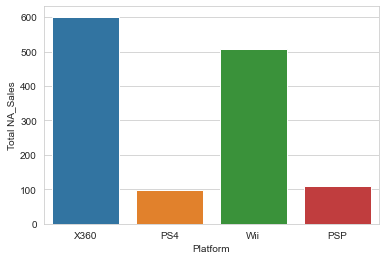

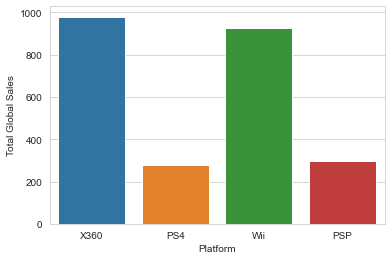

In [56]:
x1=vgs_sales["Platform"]
y1=vgs_sales["Total NA_Sales"]
z1=vgs_sales["Total Global Sales"]

#plotting with seaborn
sns.barplot(x=x1,y=y1)
sns.set_style('whitegrid')
plt.show()
sns.barplot(x=x1,y=z1)
sns.set_style('whitegrid')
plt.show()